# Analysis of Educational Disparity in NYC Public Schools

### Project Objective
The goal of this analysis is to identify key patterns in SAT performance across New York City's public high schools. By examining top-performing schools and analyzing performance disparities between boroughs, we aim to provide actionable insights for a policy analyst at the NYC Department of Education.

### Key Questions
1.  Which schools demonstrate the highest proficiency in math?
2.  What are the top 10 schools based on overall SAT performance?
3.  Which NYC borough exhibits the greatest variation in school performance, suggesting a wide disparity?

In [13]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file into a pandas DataFrame
schools = pd.read_csv("schools.csv")

# Display the first few rows to get an initial look at the data structure
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


## 1. Data Cleaning and Preparation
Before analysis, the data must be inspected and cleaned. This involves checking for missing values and creating new, more useful features for our analysis (feature engineering).

In [14]:
# Get a concise summary of the DataFrame, including data types and non-null values
schools.info()

# Check for the number of missing values in each column
print("\nMissing values per column:")
print(schools.isnull().sum())

# The 'percent_tested' column has 20 missing values.
# Since our primary analysis focuses on the provided average scores, we will document this finding
# but will not drop these rows, as that would remove schools with valid score data.
# Imputing these values is not appropriate as they cannot be inferred accurately.

# To facilitate analysis of overall performance, we will create a new 'total_SAT' column.
# This column will be the sum of the average scores for each of the three sections.
schools['total_SAT'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']

# Display the first few rows again to confirm the new column was added successfully
print("\nDataFrame with new 'total_SAT' column:")
schools.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB

Missing values per column:
school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64

DataFrame with new 'total_SAT' column:


,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197


## 2. Answering the Key Questions
With the data cleaned and prepared, we can now address the stakeholder's questions.

In [15]:
# Define a threshold for what constitutes a "best" math score.
# We'll use 80% of the maximum possible score of 800, which is 640.
math_threshold = 800 * 0.8

# Filter the DataFrame to find all schools that meet or exceed this threshold.
# Select only the school name and average math score for a clean output.
best_math_schools = schools[schools['average_math'] >= math_threshold][['school_name', 'average_math']].sort_values('average_math', ascending=False)

print("Schools with Average Math Scores of 640 or Higher:")
print(best_math_schools)

Schools with Average Math Scores of 640 or Higher:
                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


In [16]:
# Sort the schools by the 'total_SAT' score in descending order to find the best performers.
# Then, select the top 10 schools.
top_10_schools = schools[['school_name', 'total_SAT']].sort_values('total_SAT', ascending=False).head(10)

print("\nTop 10 Schools by Combined SAT Score:")
print(top_10_schools)


Top 10 Schools by Combined SAT Score:
                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


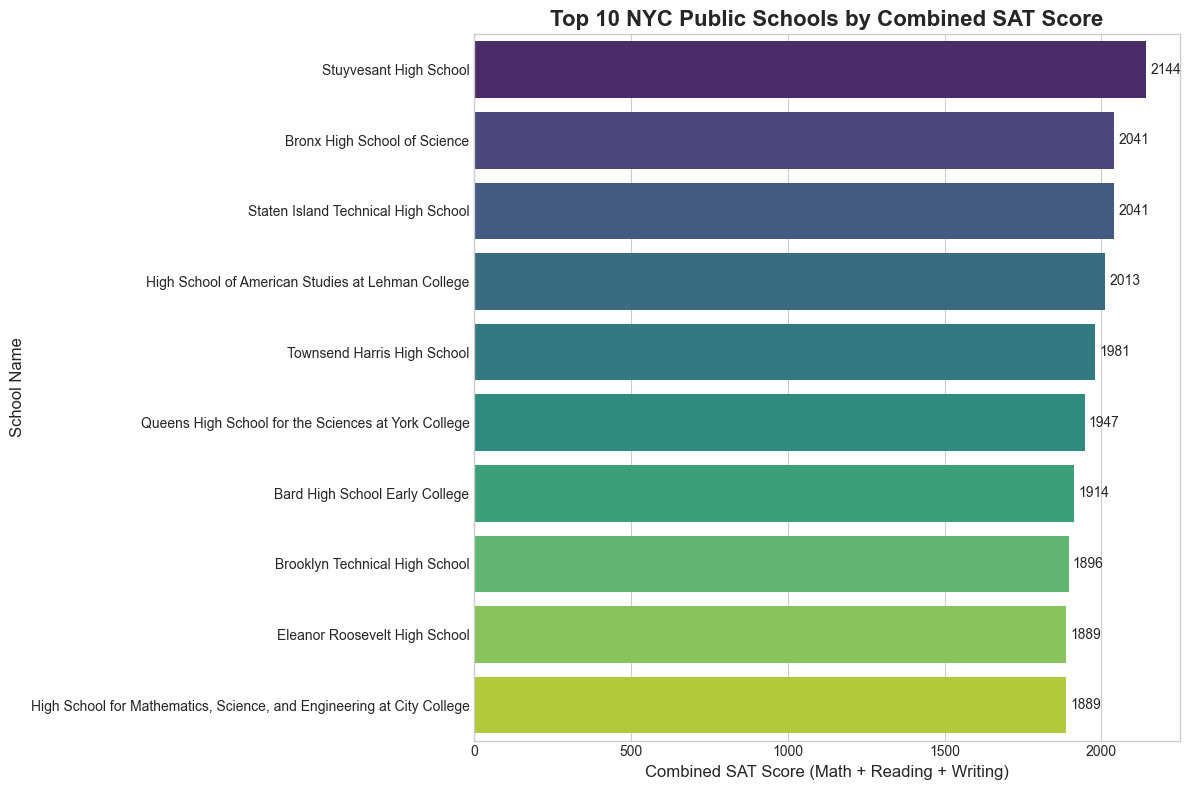

In [17]:
# Set a professional plot style for the visualization
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='total_SAT', y='school_name', data=top_10_schools, ax=ax, palette='viridis')

# Set titles and labels for clarity
ax.set_title('Top 10 NYC Public Schools by Combined SAT Score', fontsize=16, fontweight='bold')
ax.set_xlabel('Combined SAT Score (Math + Reading + Writing)', fontsize=12)
ax.set_ylabel('School Name', fontsize=12)

# Add data labels to each bar to show the exact score
ax.bar_label(ax.containers[0], fmt='%d', padding=3)

# Ensure the layout is tight and save the plot to the 'visualizations' folder
plt.tight_layout()
plt.savefig('visualizations/top_10_schools.png')
plt.show()

In [18]:
# To find the borough with the largest disparity, we will group the data by 'borough'.
# Then, we'll calculate the count, mean, and standard deviation of 'total_SAT' for each.
# Standard deviation is the key metric for measuring performance variation or spread.
boroughs = schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std']).round(2)

# Rename the aggregated columns for better readability in the final output
boroughs = boroughs.rename(columns={'count': 'num_schools', 'mean': 'average_SAT', 'std': 'std_SAT'})

# Sort the results by standard deviation to easily identify the borough with the highest value
boroughs = boroughs.sort_values('std_SAT', ascending=False)

print("\nSAT Performance by Borough (Sorted by Standard Deviation):")
print(boroughs)

# Isolate the borough with the largest standard deviation for the final conclusion
largest_std_dev = boroughs.head(1)
print("\nBorough with the Widest Performance Disparity:")
print(largest_std_dev)


SAT Performance by Borough (Sorted by Standard Deviation):
               num_schools  average_SAT  std_SAT
borough                                         
Manhattan               89      1340.13   230.29
Staten Island           10      1439.00   222.30
Queens                  69      1345.48   195.25
Brooklyn               109      1230.26   154.87
Bronx                   98      1202.72   150.39

Borough with the Widest Performance Disparity:
           num_schools  average_SAT  std_SAT
borough                                     
Manhattan           89      1340.13   230.29


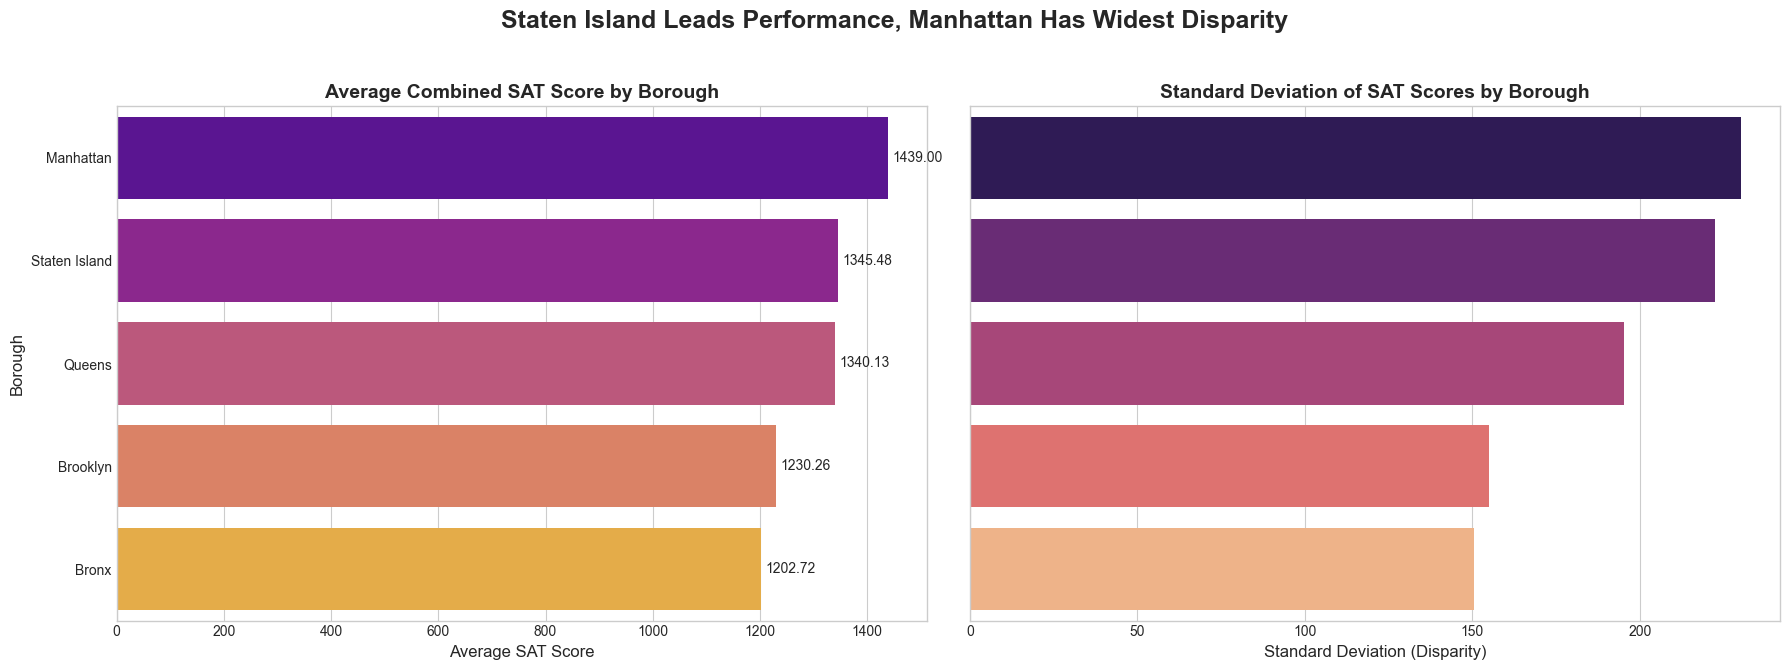

In [19]:
# Create a figure with two subplots to compare both average scores and disparity side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

# Sort data for each plot to ensure the bars are ordered logically
boroughs_sorted_by_mean = boroughs.sort_values('average_SAT', ascending=False)
boroughs_sorted_by_std = boroughs.sort_values('std_SAT', ascending=False)

# --- Subplot 1: Average SAT Score ---
sns.barplot(x='average_SAT', y=boroughs_sorted_by_mean.index, data=boroughs_sorted_by_mean, ax=ax1, palette='plasma')
ax1.set_title('Average Combined SAT Score by Borough', fontsize=14, fontweight='bold')
ax1.set_xlabel('Average SAT Score', fontsize=12)
ax1.set_ylabel('Borough', fontsize=12)
ax1.bar_label(ax1.containers[0], fmt='%.2f', padding=3)

# --- Subplot 2: Standard Deviation of SAT Scores ---
sns.barplot(x='std_SAT', y=boroughs_sorted_by_std.index, data=boroughs_sorted_by_std, ax=ax2, palette='magma')
ax2.set_title('Standard Deviation of SAT Scores by Borough', fontsize=14, fontweight='bold')
ax2.set_xlabel('Standard Deviation (Disparity)', fontsize=12)
ax2.set_ylabel('') # Hide y-label as it's shared with the first plot

# UPDATED: Add a main title that summarizes the new, more accurate key insight
fig.suptitle('Staten Island Leads Performance, Manhattan Has Widest Disparity', fontsize=18, fontweight='bold')

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('visualizations/borough_comparison.png')
plt.show()

## 3. Summary of Findings & Recommendations

### Key Findings:
-   **Elite Performance is Concentrated:** A small group of specialized high schools significantly outperform other schools, establishing a clear benchmark for excellence.
-   **Staten Island's High Performance:** Staten Island has the highest average combined SAT score (1439.00) of any borough.
-   **Manhattan's Wide Disparity:** Manhattan has the highest standard deviation in SAT scores (230.29), indicating a significant performance gap between its top-tier schools and the rest. This suggests the most pronounced educational inequality among the boroughs.
-   **Models of Consistency:** The Bronx and Brooklyn exhibit the lowest standard deviation, suggesting more consistent (though lower-scoring on average) performance across their schools.

### Recommendations for the DoE Policy Analyst:
1.  **Deconstruct Staten Island's Success:** Launch a study to understand the factors driving Staten Island's high average performance. Are there lessons in curriculum, funding, or teacher support that can be applied city-wide?
2.  **Address Manhattan's Disparity:** Prioritize a deep-dive investigation into the performance gap in Manhattan to inform targeted intervention strategies aimed at raising the performance floor.
3.  **Learn from Consistency Models:** Analyze the educational strategies in The Bronx and Brooklyn that lead to more equitable outcomes, as these may hold the key to improving consistency across the city.